Laboratorio 1

las variables que tienen que ser dummys son: 
- Male y female (1 dim)
- Smoker (1 dim)
- Region (3 dim)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


PREPROCESAMIENTO DE DATOS,
Especificar que lo has hecho, que suma puntos jiji, y representar los datos (decir que lo has hecho)

In [5]:
insurance.isnull().sum()*100/insurance.shape[0]

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

There are no null values in any column

In [12]:
print(insurance['sex'].value_counts())
print(insurance['smoker'].value_counts())
print(insurance['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [13]:
se = pd.Series(list(insurance['sex']))
sm = pd.Series(list(insurance['smoker']))
re = pd.Series(list(insurance['region']))

In [21]:
sexMale = pd.get_dummies(se, drop_first=True)
sexMale.rename(columns = {'Male':'sexMale'}, inplace = True)

smoTrue = pd.get_dummies(sm, drop_first=True)
smoTrue.rename(columns = {'Smoker':'smoTrue'}, inplace = True)

reg = pd.get_dummies(re, drop_first=True)

print(reg[1:20])

    northwest  southeast  southwest
1           0          1          0
2           0          1          0
3           1          0          0
4           1          0          0
5           0          1          0
6           0          1          0
7           1          0          0
8           0          0          0
9           1          0          0
10          0          0          0
11          0          1          0
12          0          0          1
13          0          1          0
14          0          1          0
15          0          0          1
16          0          0          0
17          0          0          0
18          0          0          1
19          0          0          1


In [22]:
# Variables fot the Linear model 
import statsmodels.api as sm
X=sexMale
y = insurance['charges']

# Add a constant to get an intercept
X_sm = sm.add_constant(X)

# Fit the resgression line using ‘OLS’
model_sex = sm.OLS(y, X_sm).fit()

print(model_sex.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.400
Date:                Wed, 20 Sep 2023   Prob (F-statistic):             0.0361
Time:                        16:36:38   Log-Likelihood:                -14475.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1336   BIC:                         2.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.257e+04    470.072     26.740      0.0

In [23]:
# Variables fot the Linear model 
X=smoTrue
y = insurance['charges']

# Add a constant to get an intercept
X_sm = sm.add_constant(X)

# Fit the resgression line using ‘OLS’
model_smo = sm.OLS(y, X_sm).fit()

print(model_smo.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          8.27e-283
Time:                        16:38:02   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8434.2683    229.014     36.829      0.0

In [24]:
# Variables fot the Linear model 
X=reg
y = insurance['charges']

# Add a constant to get an intercept
X_sm = sm.add_constant(X)

# Fit the resgression line using ‘OLS’
model_reg = sm.OLS(y, X_sm).fit()

print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.970
Date:                Wed, 20 Sep 2023   Prob (F-statistic):             0.0309
Time:                        16:38:46   Log-Likelihood:                -14473.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1334   BIC:                         2.898e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.341e+04    671.297     19.971      0.0

We're not going to include the region since the p-values are significant enough and the interval includes 0

In [32]:
data=pd.get_dummies(insurance, columns=['sex','smoker', 'region'], prefix="dmy",drop_first=True)  # drop_first removes 0 values leaving k-1 levels
data.head()

,age,bmi,children,charges,dmy_male,dmy_yes,dmy_northwest,dmy_southeast,dmy_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [37]:

# Variables fot the Linear model 
X_comp= data.iloc[:, [0, 1, 2, 5]]
y_comp = insurance['charges']

# Add a constant to get an intercept
X_sm = sm.add_constant(X_comp)

# Fit the resgression line using ‘OLS’
model_comp = sm.OLS(y_comp, X_sm).fit()

print(model_comp.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:56:50   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

In [53]:
# Variables fot the Linear model 
X_comp= data.iloc[:, [0, 2, 5]]
y_comp = insurance['charges']

# Add a constant to get an intercept
X_sm = sm.add_constant(X_comp)

# Fit the resgression line using ‘OLS’
model_comp = sm.OLS(y_comp, X_sm).fit()

print(model_comp.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1165.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:12:19   Log-Likelihood:                -13617.
No. Observations:                1338   AIC:                         2.724e+04
Df Residuals:                    1334   BIC:                         2.726e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2851.9858    543.784     -5.245      0.0

In [38]:
coeff2=model_comp.params

print(coeff2)

const      -12102.769363
age           257.849507
bmi           321.851402
children      473.502316
dmy_yes     23811.399845
dtype: float64


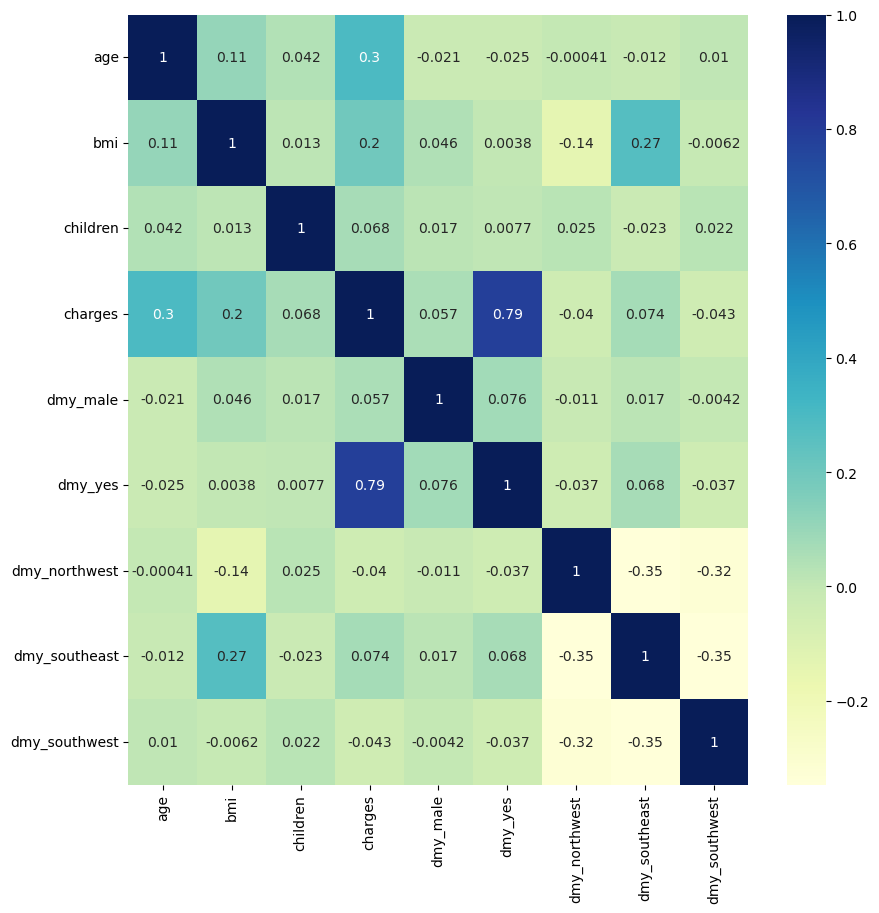

In [42]:
# Correlations
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

We can see there really is no connection between the variables, as can be predicted

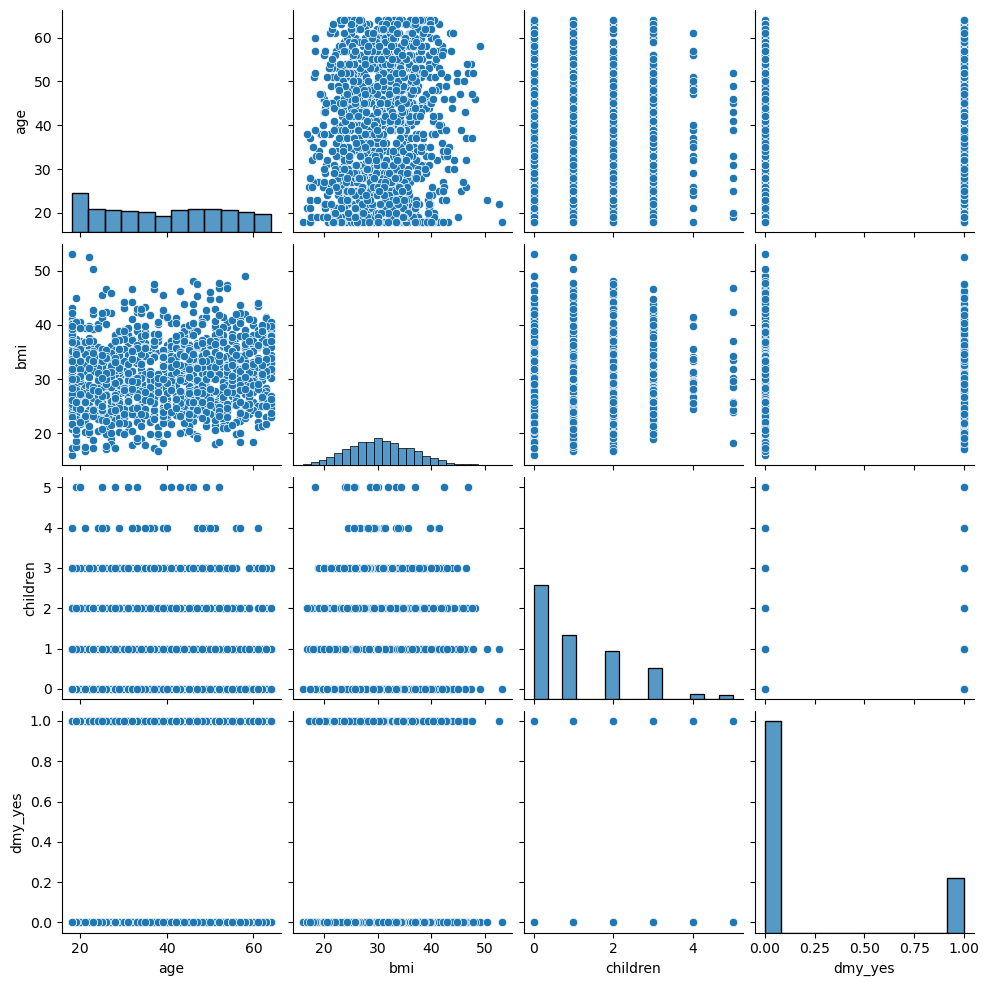

In [45]:
sns.pairplot(X_comp);

In [54]:
# VIF estimation

from statsmodels.stats.outliers_influence import variance_inflation_factor


print("Columns for VIF estimation", X_comp.columns)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_comp.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_comp.values, i)
                        for i in range(len(X_comp.columns))]

print(vif_data)

Columns for VIF estimation Index(['age', 'children', 'dmy_yes'], dtype='object')
    feature       VIF
0       age  1.878075
1  children  1.713125
2   dmy_yes  1.216355


In [55]:
x_all = data.iloc[:, [0,1,2,4,5,6,7,8]]
# VIF estimation

from statsmodels.stats.outliers_influence import variance_inflation_factor


print("Columns for VIF estimation", x_all.columns)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x_all.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_all.values, i)
                        for i in range(len(x_all.columns))]

print(vif_data)

Columns for VIF estimation Index(['age', 'bmi', 'children', 'dmy_male', 'dmy_yes', 'dmy_northwest',
       'dmy_southeast', 'dmy_southwest'],
      dtype='object')
         feature        VIF
0            age   7.686965
1            bmi  11.358443
2       children   1.809930
3       dmy_male   2.003185
4        dmy_yes   1.261233
5  dmy_northwest   1.890281
6  dmy_southeast   2.265564
7  dmy_southwest   1.960745
